In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

/home/max/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
# Загрузка данных (если данные сохранены в CSV)
data = pd.read_csv('/home/max/git/maxtyrsa/Анализ удержания и оттока пользователей мобильного приложения/user_retention_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            1000 non-null   int64         
 1   install_date       1000 non-null   datetime64[ns]
 2   last_session_date  1000 non-null   datetime64[ns]
 3   sessions_count     1000 non-null   int64         
 4   session_duration   1000 non-null   int64         
 5   actions_count      1000 non-null   int64         
 6   churned            1000 non-null   int64         
 7   usage_duration     1000 non-null   int64         
 8   install_month      1000 non-null   period[M]     
dtypes: datetime64[ns](2), int64(6), period[M](1)
memory usage: 70.4 KB
Retention Rate: 73.70%
Churn Rate: 26.30%


/tmp/ipykernel_44309/479888692.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Retention Rate', 'Churn Rate'], y=[retention_rate, churn_rate], palette='viridis')


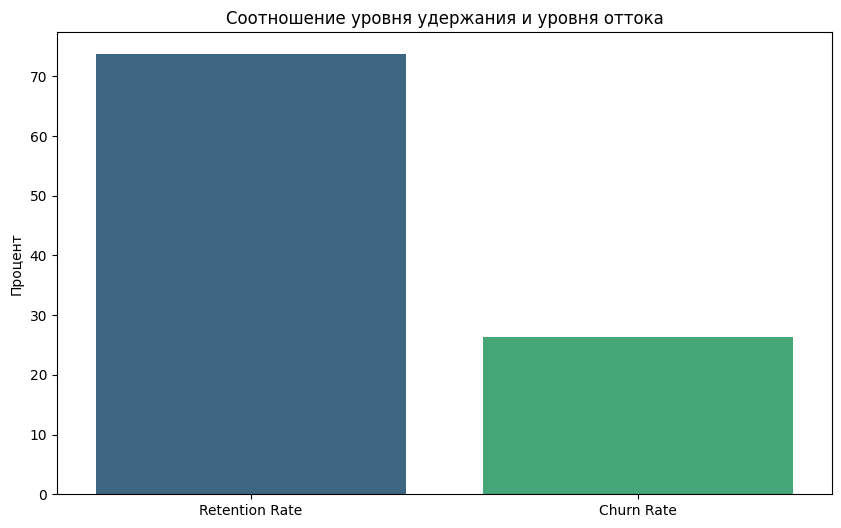

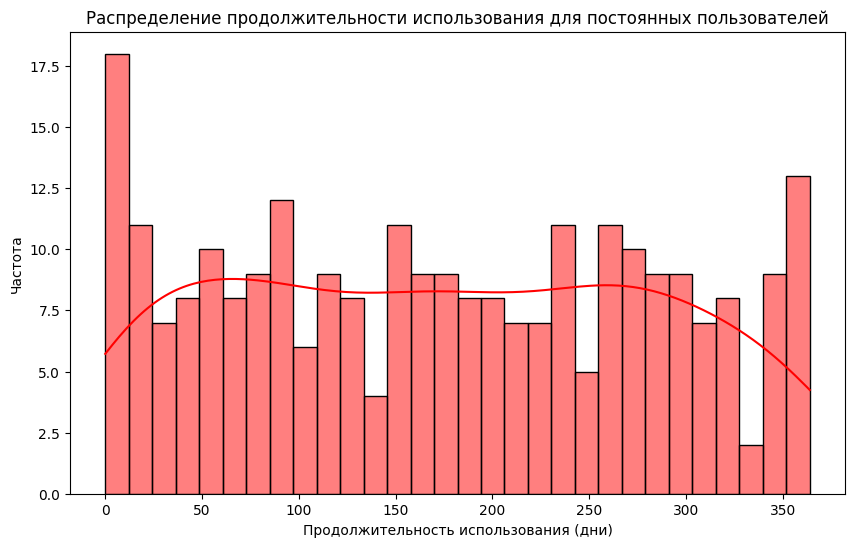

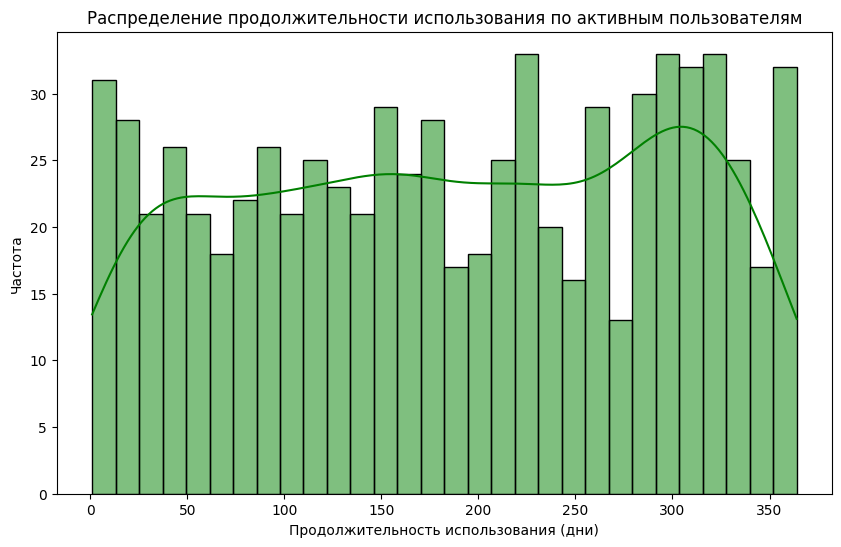

/tmp/ipykernel_44309/479888692.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y='sessions_count', data=data, palette='coolwarm')


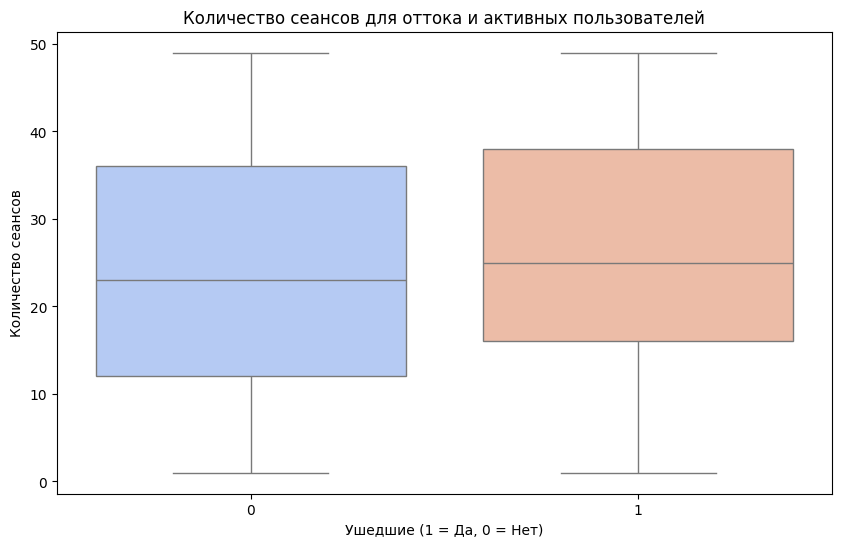

/tmp/ipykernel_44309/479888692.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y='session_duration', data=data, palette='coolwarm')


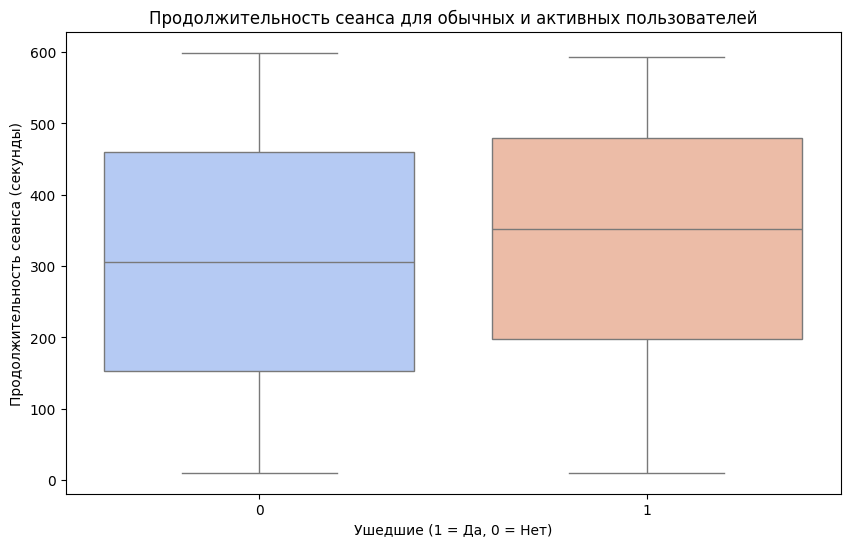

/tmp/ipykernel_44309/479888692.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y='actions_count', data=data, palette='coolwarm')


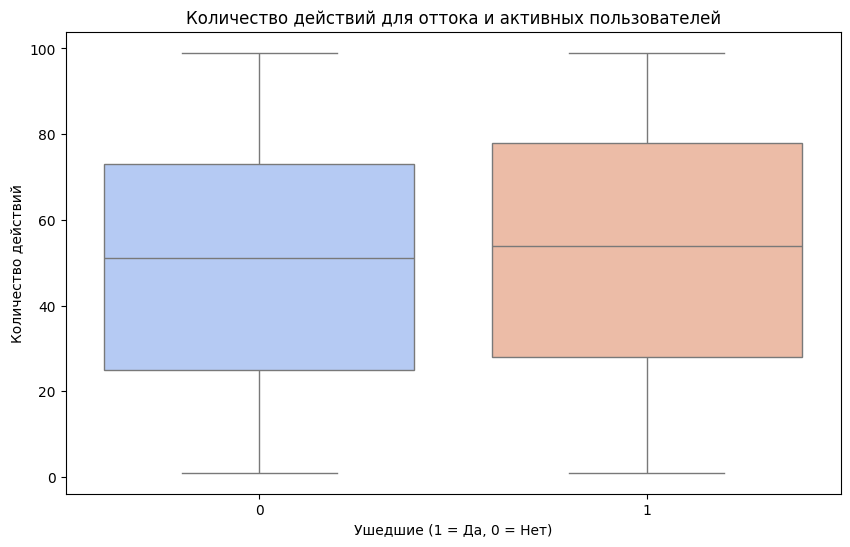

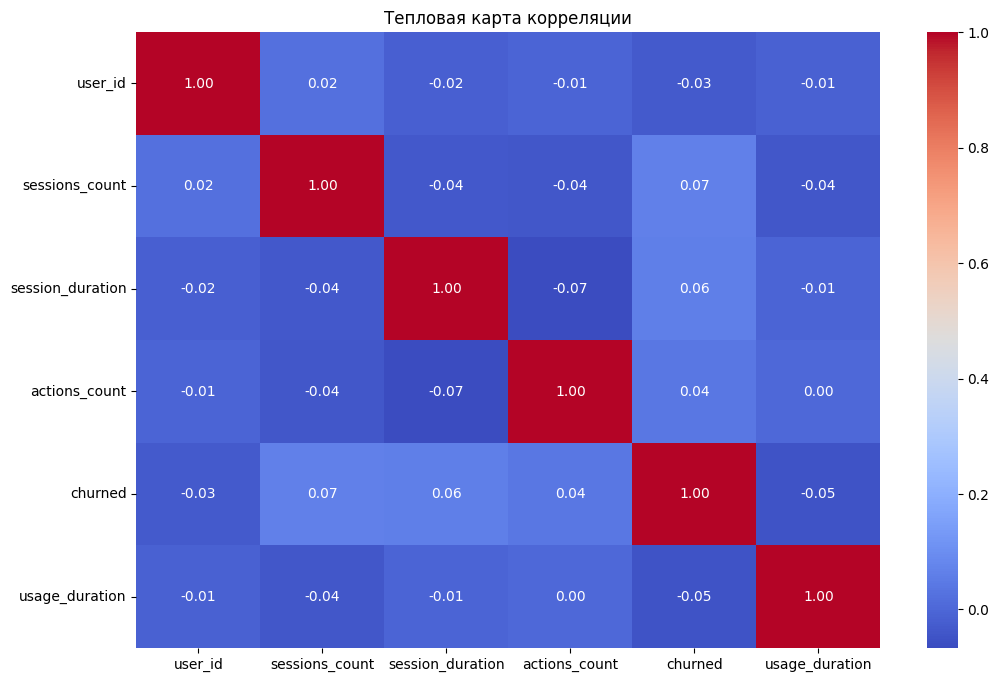

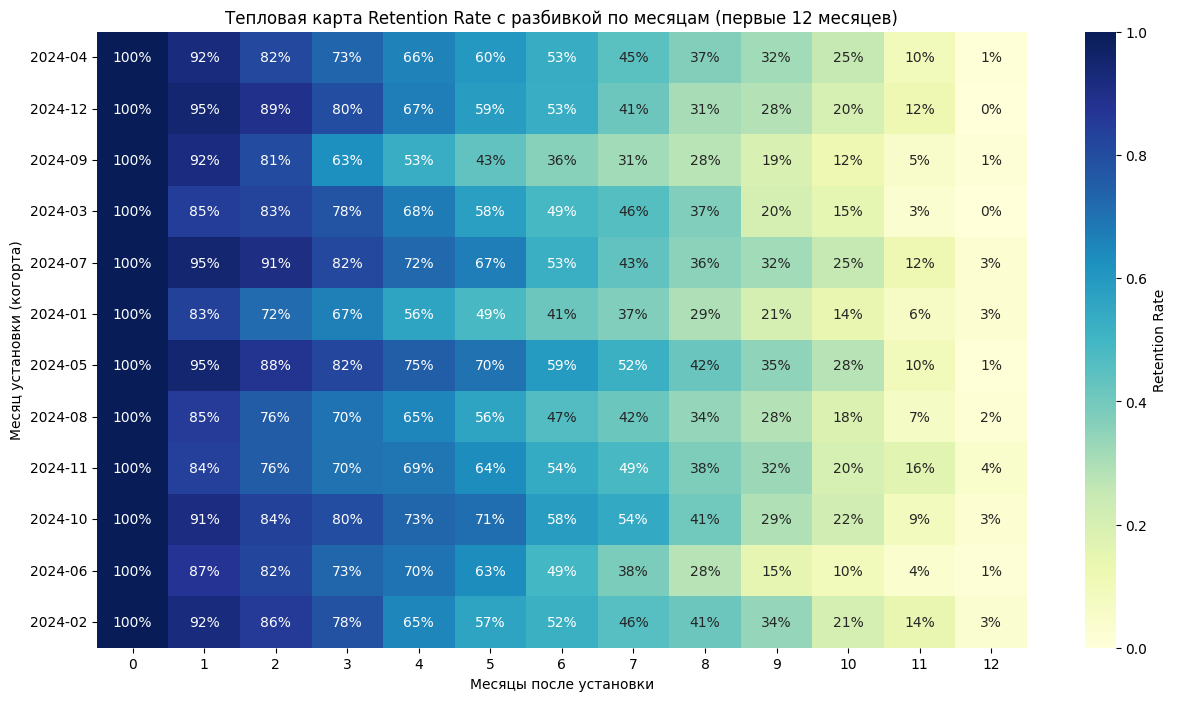

Выводы:
1. Retention Rate составляет 73.70%, что указывает на относительно высокий уровень удержания пользователей.
2. Churn Rate составляет 26.30%, что указывает на необходимость анализа причин оттока пользователей.
3. Рекомендуется провести опросы ушедших пользователей для выявления причин их ухода.
4. Улучшение onboarding процесса и внедрение программ лояльности могут помочь снизить уровень оттока.


In [8]:
# Просмотр первых строк данных
data.head()

# Основная информация о данных
data.info()

# Проверка на пропущенные значения
data.isnull().sum()

# Преобразование дат в формат datetime
data['install_date'] = pd.to_datetime(data['install_date'])
data['last_session_date'] = pd.to_datetime(data['last_session_date'])

# Добавление столбца с продолжительностью использования продукта (в днях)
data['usage_duration'] = (data['last_session_date'] - data['install_date']).dt.days

# Просмотр обновленных данных
data.head()

# Определение ушедших пользователей (churned)
# В данном случае, если пользователь ушел, то churned = 1
churned_users = data[data['churned'] == 1]
active_users = data[data['churned'] == 0]

# Количество ушедших и активных пользователей
num_churned = churned_users.shape[0]
num_active = active_users.shape[0]
total_users = data.shape[0]

# Расчет Retention Rate и Churn Rate
retention_rate = (num_active / total_users) * 100
churn_rate = (num_churned / total_users) * 100

# Вывод результатов
print(f"Retention Rate: {retention_rate:.2f}%")
print(f"Churn Rate: {churn_rate:.2f}%")

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.barplot(x=['Retention Rate', 'Churn Rate'], y=[retention_rate, churn_rate], palette='viridis')
plt.title('Соотношение уровня удержания и уровня оттока')
plt.ylabel('Процент')
plt.show()

# Анализ продолжительности использования продукта ушедшими пользователями
plt.figure(figsize=(10, 6))
sns.histplot(churned_users['usage_duration'], bins=30, kde=True, color='red')
plt.title('Распределение продолжительности использования для постоянных пользователей')
plt.xlabel('Продолжительность использования (дни)')
plt.ylabel('Частота')
plt.show()

# Анализ продолжительности использования продукта активными пользователями
plt.figure(figsize=(10, 6))
sns.histplot(active_users['usage_duration'], bins=30, kde=True, color='green')
plt.title('Распределение продолжительности использования по активным пользователям')
plt.xlabel('Продолжительность использования (дни)')
plt.ylabel('Частота')
plt.show()

# Анализ количества сессий ушедших и активных пользователей
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='sessions_count', data=data, palette='coolwarm')
plt.title('Количество сеансов для оттока и активных пользователей')
plt.xlabel('Ушедшие (1 = Да, 0 = Нет)')
plt.ylabel('Количество сеансов')
plt.show()

# Анализ продолжительности сессий ушедших и активных пользователей
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='session_duration', data=data, palette='coolwarm')
plt.title('Продолжительность сеанса для обычных и активных пользователей')
plt.xlabel('Ушедшие (1 = Да, 0 = Нет)')
plt.ylabel('Продолжительность сеанса (секунды)')
plt.show()

# Анализ количества действий ушедших и активных пользователей
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='actions_count', data=data, palette='coolwarm')
plt.title('Количество действий для оттока и активных пользователей')
plt.xlabel('Ушедшие (1 = Да, 0 = Нет)')
plt.ylabel('Количество действий')
plt.show()

# Тепловая карта корреляции между переменными
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)  # Расчет корреляционной матрицы
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()

# Добавление столбца с месяцем установки
data['install_month'] = data['install_date'].dt.to_period('M')

# Создание таблицы для тепловой карты Retention Rate с разбивкой по месяцам
# Определим максимальное количество месяцев для анализа (ограничим 12 месяцами)
max_months = 12  # Ограничиваем 12 месяцами
retention_data = pd.DataFrame(index=data['install_month'].unique(), columns=range(max_months + 1))

# Заполнение таблицы Retention Rate
for install_month in data['install_month'].unique():
    cohort_data = data[data['install_month'] == install_month]
    for month in range(max_months + 1):
        # Рассчитываем Retention Rate для каждого месяца
        retention_data.loc[install_month, month] = cohort_data[cohort_data['usage_duration'] >= month * 30].shape[0] / cohort_data.shape[0]

# Преобразование данных в числовой формат
retention_data = retention_data.astype(float)

# Визуализация тепловой карты Retention Rate с разбивкой по месяцам (только первые 12 месяцев)
plt.figure(figsize=(15, 8))
sns.heatmap(retention_data, cmap='YlGnBu', annot=True, fmt='.0%', cbar_kws={'label': 'Retention Rate'})
plt.title('Тепловая карта Retention Rate с разбивкой по месяцам (первые 12 месяцев)')
plt.xlabel('Месяцы после установки')
plt.ylabel('Месяц установки (когорта)')
plt.show()

# Выводы и рекомендации
print("Выводы:")
print("1. Retention Rate составляет {:.2f}%, что указывает на относительно высокий уровень удержания пользователей.".format(retention_rate))
print("2. Churn Rate составляет {:.2f}%, что указывает на необходимость анализа причин оттока пользователей.".format(churn_rate))
print("3. Рекомендуется провести опросы ушедших пользователей для выявления причин их ухода.")
print("4. Улучшение onboarding процесса и внедрение программ лояльности могут помочь снизить уровень оттока.")